### Import Libraries & reading in data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('Amazon Sale Report.csv')
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18224\2682170935.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


## Dataset Recognizing

In [3]:
data.shape

(128975, 24)

In [4]:
data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [6]:
data.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [7]:
data.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [8]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

## Data Cleaning

In [9]:
data.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

In [10]:
data[data.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [11]:
len(data)-len(data.drop_duplicates(['Order ID','ASIN']))

7

In [12]:
data.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

#### Filling in null values

In [13]:
data.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49150
B2B                       0
dtype: int64

In [14]:
data['Courier Status'].fillna('Unavailable',inplace=True)

In [15]:
data['promotion-ids'].fillna('Not Promoted',inplace=True)

In [16]:
data[data['Amount'].isnull()]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,Unavailable,0,NaN,GUWAHATI,ASSAM,781003.0,Not Promoted,False
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,Dahod,Gujarat,389151.0,Not Promoted,False
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,HYDERABAD,TELANGANA,500072.0,Not Promoted,False
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,PUNE,MAHARASHTRA,411046.0,Not Promoted,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128896,406-3923120-4345139,05-31-22,Cancelled,Amazon,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,Not Promoted,False
128900,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,Not Promoted,False
128901,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,Not Promoted,False
128951,408-9513596-4393945,05-31-22,Cancelled,Amazon,Expedited,SET058,SET058-KR-NP-L,Set,L,B07R487XRD,Cancelled,0,NaN,Bengaluru,KARNATAKA,560037.0,Not Promoted,False


In [17]:
data[(data['Amount'].isnull()) & (data['Status'] == 'Cancelled')]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,Unavailable,0,NaN,GUWAHATI,ASSAM,781003.0,Not Promoted,False
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,Dahod,Gujarat,389151.0,Not Promoted,False
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,HYDERABAD,TELANGANA,500072.0,Not Promoted,False
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,PUNE,MAHARASHTRA,411046.0,Not Promoted,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128896,406-3923120-4345139,05-31-22,Cancelled,Amazon,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,Not Promoted,False
128900,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,Not Promoted,False
128901,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,Not Promoted,False
128951,408-9513596-4393945,05-31-22,Cancelled,Amazon,Expedited,SET058,SET058-KR-NP-L,Set,L,B07R487XRD,Cancelled,0,NaN,Bengaluru,KARNATAKA,560037.0,Not Promoted,False


In [18]:
data[data['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [19]:
data['Amount'].fillna(0,inplace=True)

In [20]:
data['ship-city'].fillna('Unavailable', inplace = True)
data['ship-state'].fillna('Unavailable', inplace = True)
data['ship-postal-code'].fillna('Unavailable', inplace = True)

In [21]:
data.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

#### Renaming Columns

In [22]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'promotion-ids', 'B2B'],
      dtype='object')

In [23]:
data = data.rename(columns={
            'Order ID': 'order_ID', 'Date': 'date',
            'Status': 'cargo_status', 'Fulfilment': 'fulfilment',
            'ship-service-level': 'service_level', 'Style': 'style',
            'SKU': 'stock_unit', 'Category': 'product_cate',
            'Size': 'size', 'ASIN': 'amazon_ID',
            'Courier Status': 'courier_ship_status', 'Qty': 'order_qty',
            'Amount': 'order_amount_($)', 'ship-city': 'city',
            'ship-state': 'state', 'ship-postal-code': 'zip',
            'promotion-ids': 'promotion', 'B2B': 'customer_cate',
            })
print(data.columns)

Index(['order_ID', 'date', 'cargo_status', 'fulfilment', 'service_level',
       'style', 'stock_unit', 'product_cate', 'size', 'amazon_ID',
       'courier_ship_status', 'order_qty', 'order_amount_($)', 'city', 'state',
       'zip', 'promotion', 'customer_cate'],
      dtype='object')


#### Convert Column Values

In [24]:
exchange_rate = 0.0120988
data['order_amount_($)'] = data['order_amount_($)'].apply(lambda x: x * exchange_rate)

In [25]:
data['customer_cate'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [26]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\user\AppData\Local\Temp\ipykernel_18224\736794659.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


In [27]:
data['date'][data['date'].dt.month == 3].dt.day.nunique()

1

In [28]:
data = data[(data['date'].dt.month != 3)]

In [29]:
data['month'] = data['date'].dt.month
data["month"].unique()

array([4, 5, 6])

#### Sorting Column Values

In [30]:
months = { 4: 'april',5: 'may',6: 'june'}
data['month'] = data['date'].dt.month.map(months)

In [31]:
month_order = ['april', 'may', 'june']

data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

In [32]:
print(f'This dataset contains the months {data["month"].unique()} for year 2022')
print(f'The earliest date is {data["date"].min()}')
print(f'The latest date is {data["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for year 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


In [33]:
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

data.loc[:, 'size'] = pd.Categorical(data['size'], categories=size_order, ordered=True)

# Data Visualization / EDA

### Sales Analysis

#### What is the total revenue generated over a specific time period?

In [43]:
total_revenue = data['order_amount_($)'].sum()

print(f'Total revenue generated from {data["date"].min()} to {data["date"].max()}: ${total_revenue:,.2f}') #.2f for 2 decimals

Total revenue generated from 2022-04-01 00:00:00 to 2022-06-29 00:00:00: $949,609.07


In [34]:
revenue_by_month = data.groupby('month')['order_amount_($)'].sum()
percent_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april'] * 100
percent_decrease_may_to_jun = (revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may'] * 100
total_decrease = (revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april'] * 100

print(f"Total revenue for April 2022: ${revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: ${revenue_by_month['may']:,.2f}, which is a -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ${revenue_by_month['june']:,.2f}, which is a -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")

Total revenue for April 2022: $348,913.76
Total revenue for May 2022: $317,285.20, which is a -9.06% decrease from April.
Total revenue for June 2022: $283,410.11, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%


Insights:
Notable difference with significant decrease in revenue over two months.

#### What are the top 10 product categories by sales?

In [35]:
revenue_by_category = data.groupby('product_cate')['order_amount_($)'].sum().sort_values(ascending=False)

print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "${:,.2f}".format(x)))

Total revenue by product category:
product_cate
Set              $473,645.49
kurta            $257,272.15
Western Dress    $135,608.42
Top               $64,647.29
Ethnic Dress       $9,559.49
Blouse             $5,542.80
Bottom             $1,822.90
Saree              $1,499.45
Dupatta               $11.07
Name: order_amount_($), dtype: object


In [36]:
revenue_by_category = data.groupby('product_cate')['order_amount_($)'].sum()
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))

print("Percentage of revenue by product category:")
print(percent_revenue_by_category)

Percentage of revenue by product category:
product_cate
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount_($), dtype: object


Insights:
Set is the most sold category, possibly noting sales occur with sets and/or amazon buyers tend to lean for convinience rather than putting together several single pieces of clothing.

#### What is the average order value?

In [65]:
total_orders = data.shape[0]
average_order_value = total_revenue / total_orders

print(f'Average Order Value: ${average_order_value:.2f}')

Average Order Value: $7.37


In [40]:
monthly_order_data = data.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'mean', 'order_qty': 'mean'})
monthly_order_data = monthly_order_data.rename(columns={'order_amount_($)': 'average_order_amount', 'order_qty': 'average_order_quantity'})

print(monthly_order_data)

            average_order_amount  average_order_quantity
date                                                    
2022-04-30              7.111256                0.900968
2022-05-31              7.547940                0.904177
2022-06-30              7.518307                0.909248


In [37]:
avg_price_by_category = data.groupby('product_cate')['order_amount_($)'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)

print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))

Top 5 product categories by average price:
product_cate
Set              9.434042
Saree            9.142986
Western Dress    8.754014
Ethnic Dress     8.255171
Top              6.091331
Name: order_amount_($), dtype: float64


Insights:
No significant deviation of every month average order to total orders although in May and June, people tend to order less in quantity and price but higher for a single purchase (categories for average price above total).

#### What are the peak sales periods (day, month)?

In [66]:
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].dt.month

daily_sales = data.groupby(data['date']).agg({'order_amount_($)': 'sum'})
monthly_sales = data.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum'}) #grouper func with 'Month' freq

peak_sales_day = daily_sales.idxmax()[0].strftime('%Y-%m-%d') #strftime('%Y-%m-%d') is reformat YYYY-MM-DD
peak_sales_month = monthly_sales.idxmax()[0].strftime('%Y-%m')

print(f"Peak Sales Day: {peak_sales_day}")
print(f"Peak Sales Month: {peak_sales_month}")

Peak Sales Day: 2022-05-04
Peak Sales Month: 2022-04


### Customer Analysis

#### What are the top cities/states for sales?

In [67]:
city_sales = data.groupby('city')['order_amount_($)'].sum().sort_values(ascending=False)
state_sales = data.groupby('state')['order_amount_($)'].sum().sort_values(ascending=False)

print("Top cities for product sales:")
print(city_sales.head(10).round(2))

print("\nTop states for product sales:")
print(state_sales.head(10).round(2))

Top cities for product sales:
city
BENGALURU    82781.19
HYDERABAD    59791.70
MUMBAI       44781.81
NEW DELHI    43638.01
CHENNAI      37430.25
PUNE         28219.12
KOLKATA      17076.55
GURUGRAM     14771.68
THANE        12133.94
LUCKNOW      11276.99
Name: order_amount_($), dtype: float64

Top states for product sales:
state
MAHARASHTRA       161134.58
KARNATAKA         126645.04
TELANGANA          83633.39
UTTAR PRADESH      82333.91
TAMIL NADU         78722.02
DELHI              51151.21
KERALA             46280.94
WEST BENGAL        42332.58
ANDHRA PRADESH     38912.29
HARYANA            34828.76
Name: order_amount_($), dtype: float64


Insights:
Could notice the possible population difference with Bengaluru to other cities and Maharashtra to other states.

#### Are there any trends in order cancellations?

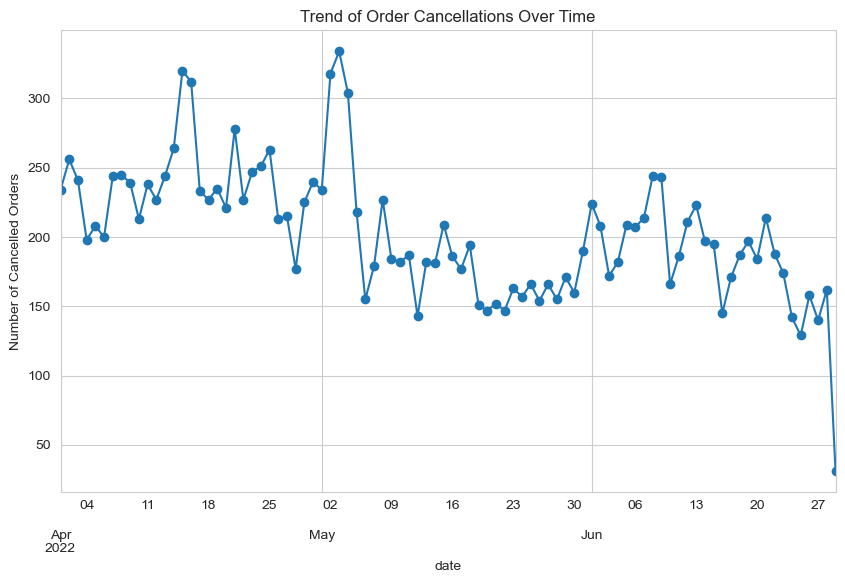

In [48]:
cancelled_orders_by_date = data[data['cargo_status'] == 'Cancelled'].groupby('date').size()

plt.figure(figsize=(10, 6))
cancelled_orders_by_date.plot(marker='o', linestyle='-')
plt.title('Trend of Order Cancellations Over Time')
plt.xlabel('date')
plt.ylabel('Number of Cancelled Orders')
plt.grid(True) #for grid lines
plt.show()

Insights:
Shows a positive correlation with revenue also decreasing and peaking at 05/04 also as the peak sales day.

#### What is the distribution of B2B vs B2C customers?

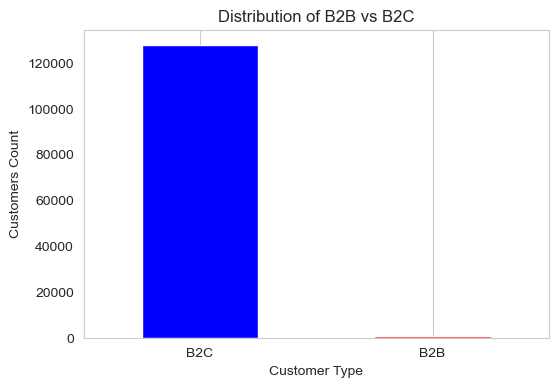

B2C Customers: 127926
B2B Customers: 871


In [55]:
b2b_b2c_distribution = data['customer_cate'].value_counts()

plt.figure(figsize=(6, 4))
b2b_b2c_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of B2B vs B2C')
plt.xlabel('Customer Type')
plt.ylabel('Customers Count')
plt.xticks(ticks=[0, 1], labels=['B2C', 'B2B'], rotation=0)
plt.grid(axis='y')
plt.show()

print(f'B2C Customers: {b2b_b2c_distribution["customer"]}')
print(f'B2B Customers: {b2b_b2c_distribution["business"]}')

In [42]:
avg_order_amount_by_customer_type = data.groupby('customer_cate')['order_amount_($)'].mean()

print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "${:,.2f}".format(x)))

Average order amount by customer type:
customer_cate
business    $8.21
customer    $7.37
Name: order_amount_($), dtype: object


Insights:
As expected, Amazon aims mainly at customers and not business, with business purchasing larger qty at a time thus showing a higher average order amount.

### Shipping Analysis

#### How does the rate of cancelled orders vary between different shipping service levels?

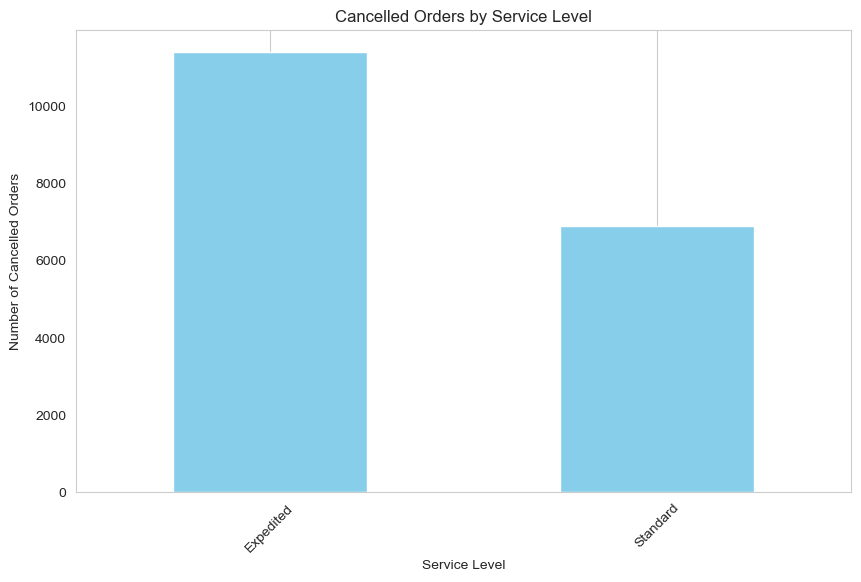

Cancelled Orders by Service Level:
service_level
Expedited    11408
Standard      6903
Name: count, dtype: int64


In [57]:
cancelled_orders = data[data['cargo_status'] == 'Cancelled']
cancelled_service_counts = cancelled_orders['service_level'].value_counts()

cancelled_service_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Cancelled Orders by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Cancelled Orders by Service Level:")
print(cancelled_service_counts)

Insights:
With Expedited being faster shipping but holding higher cancel rate may show the impulses of purchase tend to happen to people who are characterized with possible impatience and more average income.

#### What percentage of orders are fulfilled by Amazon vs Others?

In [58]:
fulfillment_counts = data['fulfilment'].value_counts()
total_orders = len(data)
percentage_amazon = (fulfillment_counts['Amazon'] / total_orders) * 100
percentage_merchant = (fulfillment_counts['Merchant'] / total_orders) * 100

print("Percentage of Orders Fulfilled by Amazon Company:", percentage_amazon)
print("Percentage of Orders Fulfilled by Individual Seller:", percentage_merchant)

Percentage of Orders Fulfilled by Amazon Company: 69.5225820477185
Percentage of Orders Fulfilled by Individual Seller: 30.4774179522815


Insights:
As expected, Amazon holds the most sellers at its own platform.

### Product Analysis

#### Which categories of products are most popular? (qty)

In [70]:
qty_by_category = data.groupby('product_cate')['order_qty'].sum()
percent_qty_by_category = ((qty_by_category / qty_by_category.sum()) * 100).sort_values(ascending=False)
percent_qty_by_category = percent_qty_by_category.apply(lambda x: "{:.2f}%".format(x))

print("Percentage of quantity by product category:")
print(percent_qty_by_category)

Percentage of quantity by product category:
product_cate
Set              38.82%
kurta            38.61%
Western Dress    11.96%
Top               8.49%
Ethnic Dress      0.90%
Blouse            0.74%
Bottom            0.34%
Saree             0.13%
Dupatta           0.00%
Name: order_qty, dtype: object


#### Which categories of products are most popular? (revenue)

In [71]:
revenue_by_category = data.groupby('product_cate')['order_amount_($)'].sum().sort_values(ascending=False)

print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "${:,.2f}".format(x)))

Total revenue by product category:
product_cate
Set              $473,645.49
kurta            $257,272.15
Western Dress    $135,608.42
Top               $64,647.29
Ethnic Dress       $9,559.49
Blouse             $5,542.80
Bottom             $1,822.90
Saree              $1,499.45
Dupatta               $11.07
Name: order_amount_($), dtype: object


#### Are there specific styles that are more popular than others?

In [59]:
popular_style = data.groupby('style')['order_qty'].sum()
popular_style = popular_style.sort_values(ascending=False)

print("Top 10 Most Popular Styles:")
print(popular_style.head(10).round(2))

Top 10 Most Popular Styles:
style
JNE3797    3690
JNE3405    2062
SET268     1728
J0230      1706
J0341      1469
J0003      1385
SET324     1151
SET345     1133
JNE3373    1067
JNE3399     971
Name: order_qty, dtype: int64


Insights:
Interestingly, the total revenue generated for  Set and Kurta has almost 45% difference but the quantity are similar, possibly resembling the downfall of Kurta fashion which in these three months, supply are way over demand and will go on sale soon.

#### What is the average quantity of products ordered?

In [60]:
avg_qty_by_category = data.groupby('product_cate')['order_qty'].mean()
avg_qty_by_category = avg_qty_by_category.sort_values(ascending=False)

print("Top 5 product categories by average quantity:")
print(avg_price_by_category.head(5))

Top 5 product categories by average quantity:
product_cate
Set              9.434042
Saree            9.142986
Western Dress    8.754014
Ethnic Dress     8.255171
Top              6.091331
Name: order_amount_($), dtype: float64


### Promotional Analysis

#### Which promotion are most commonly used?

In [72]:
promoted_data = data[data['promotion'] != 'Not Promoted']
promotion_counts = promoted_data['promotion'].value_counts()

print("Most Commonly Used Promotion:")
print(promotion_counts.head(1))

Most Commonly Used Promotion:
promotion
IN Core Free Shipping 2015/04/08 23-48-5-108    46006
Name: count, dtype: int64


### Geographical Analysis

In [77]:
popular_category_by_state = data.groupby(['state', 'product_cate'])['order_qty'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_qty'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])

print("Most popular product category in each state:")
print(popular_category_by_state)

Most popular product category in each state:
                  state product_cate  order_qty
1    ANDAMAN & NICOBAR           Set        108
12       ANDHRA PRADESH        kurta       2298
13                  APO          Set          0
14                   AR          Top          1
17    ARUNACHAL PRADESH          Set         55
..                  ...          ...        ...
317                 goa        kurta          3
318              orissa          Set          1
319              punjab          Set          8
324           rajasthan          Top          2
326            rajsthan        kurta          1

[70 rows x 3 columns]


#### Are there emerging markets that are showing growth?

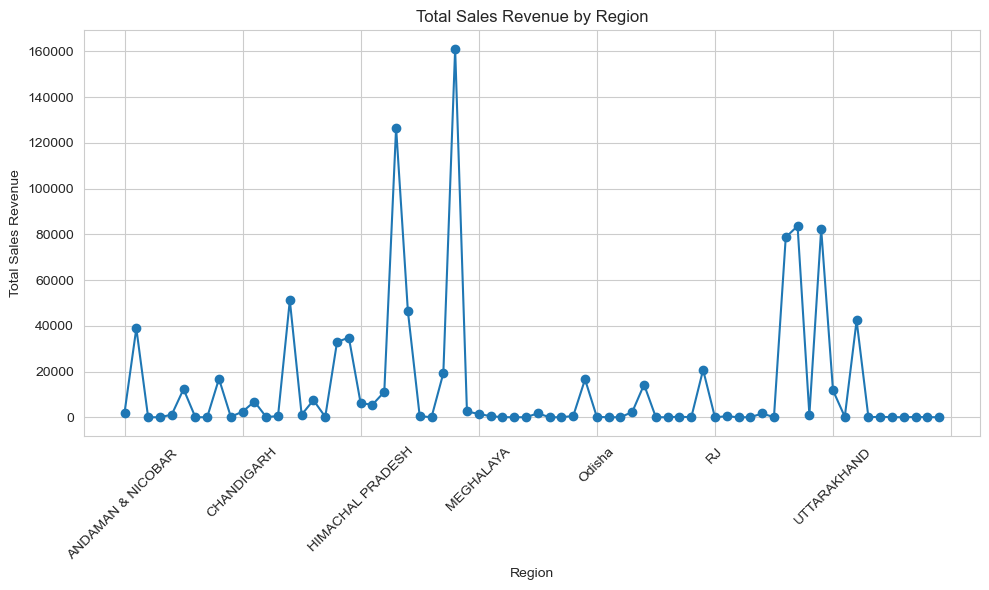

In [62]:
sales_by_region = data.groupby('state')['order_amount_($)'].sum()

sales_by_region.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-')
plt.title('Total Sales Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Insights:
Sales by states show that although Megahalaya has peaked in April, but statistically, Chandigarh and Himachal are on the rise with emerging markets after June in which the data provide ends.

### Monthly Analysis

#### What does the overall trend show?

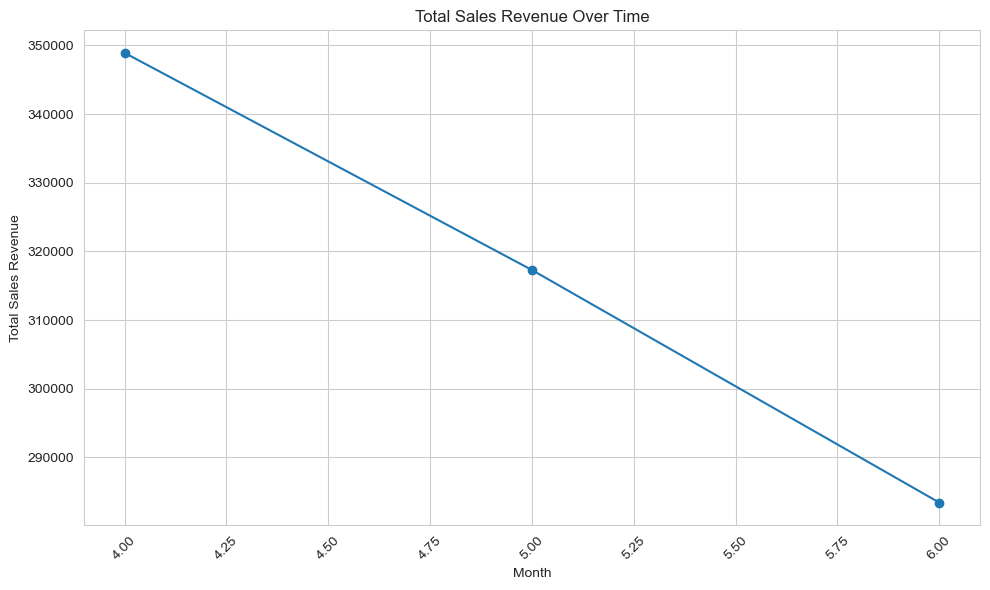

In [63]:
monthly_sales = data.groupby(['month'])['order_amount_($)'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Total Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Insights:
Overall rather consistent decrease in sales throughout April to June

### Return/Cancelled Order Analysis

#### Percentage of all cancelled/return orders

In [39]:
cancelled_orders = data[data['cargo_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = data[data['cargo_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled / len(data) * 100
percent_returned = total_returned / len(data) * 100
percent_cancelled_returned = total_cancelled_returned / data['order_qty'].sum() * 100

print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")

Total cancelled orders: 18316, which is 14.22% of all orders.
Total returned orders: 2109, which is 1.64% of all orders.
This represents 17.53% of all orders.


#### Are there specific products or categories that have a higher return rate?

In [64]:
total_orders = len(data)

total_returned_orders = len(returned_orders)

total_cancelled_orders = len(cancelled_orders)

return_rates_by_product = returned_orders.groupby('product_cate').size() / data.groupby('product_cate').size()
return_rates_by_product = return_rates_by_product.dropna()

return_rates_by_category = returned_orders.groupby('product_cate')['order_qty'].sum() / data.groupby('product_cate')['order_qty'].sum()

average_return_rate = total_returned_orders / total_orders
higher_return_products = return_rates_by_product[return_rates_by_product > average_return_rate]
higher_return_categories = return_rates_by_category[return_rates_by_category > average_return_rate]

print("Products with Higher Return Rates:")
print(higher_return_products)

print("\nCategories with Higher Return Rates:")
print(higher_return_categories)

Products with Higher Return Rates:
product_cate
Set              0.016811
Western Dress    0.022206
dtype: float64

Categories with Higher Return Rates:
product_cate
Set              0.018731
Western Dress    0.024682
kurta            0.017055
Name: order_qty, dtype: float64


Insights:
With cancelled orders outweighing return orders possibly represents impulse of buyers and consumers being uncertain of their decisions rather than the lack of quality of the products provided by sellers.

## Conclusion

Overall, we can see the reducing market for Amazon India from 2022 April to June.
Over the analysis, we can bring our knowledge to the below:
- The steady decrease might be found in the product category: Kurta, with supply > demand
- Although free shipping is the main method for promoting in larger cities, there might be a need for gifting other products or other sort of promotion for emerging market city and states.
- Consumers on Amazon tend to lean toward Set wears, having the appearance of convinience being prioritized.
- Trend is showing for higher priced singular purchase rather than multiple lower priced purchase.
- Expedited shipping shows high cancel rates as well as overall, which possibly would show a form of rechecking purchase or clarity of product being purchased needed.

Amazon India should strive to promote product categories other than set wear with possible collaborations with individual sellers to increase their audience in emerging market for the long run.